In [3]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,classification_report
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

In [15]:
df=pd.read_csv('E_Commerce_data.csv')
df

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,160
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,121
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,55626,0,10.0,Computer,1,30.0,Credit Card,Male,3.0,2,Laptop & Accessory,1,Married,6,0,18.0,1.0,2.0,4.0,151
5626,55627,0,13.0,Mobile Phone,1,13.0,Credit Card,Male,3.0,5,Fashion,5,Married,6,0,16.0,1.0,2.0,NaN,225
5627,55628,0,1.0,Mobile Phone,1,11.0,Debit Card,Male,3.0,2,Laptop & Accessory,4,Married,3,1,21.0,1.0,2.0,4.0,186
5628,55629,0,23.0,Computer,3,9.0,Credit Card,Male,4.0,5,Laptop & Accessory,4,Married,4,0,15.0,2.0,2.0,9.0,179


In [17]:
df.head(5)

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,160
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,121
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,130


In [19]:
df.tail(5)

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
5625,55626,0,10.0,Computer,1,30.0,Credit Card,Male,3.0,2,Laptop & Accessory,1,Married,6,0,18.0,1.0,2.0,4.0,151
5626,55627,0,13.0,Mobile Phone,1,13.0,Credit Card,Male,3.0,5,Fashion,5,Married,6,0,16.0,1.0,2.0,NaN,225
5627,55628,0,1.0,Mobile Phone,1,11.0,Debit Card,Male,3.0,2,Laptop & Accessory,4,Married,3,1,21.0,1.0,2.0,4.0,186
5628,55629,0,23.0,Computer,3,9.0,Credit Card,Male,4.0,5,Laptop & Accessory,4,Married,4,0,15.0,2.0,2.0,9.0,179
5629,55630,0,8.0,Mobile Phone,1,15.0,Credit Card,Male,3.0,2,Laptop & Accessory,3,Married,4,0,13.0,2.0,2.0,3.0,169


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [23]:
df.describe()

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,5630.000000,5630.000000,5366.000000,5630.000000,5379.000000,5375.000000,5630.000000,5630.000000,5630.000000,5630.000000,5365.000000,5374.000000,5372.000000,5323.000000,5630.000000
mean,52815.500000,0.168384,10.189899,1.654707,15.639896,2.931535,3.688988,3.066785,4.214032,0.284902,15.707922,1.751023,3.008004,4.543491,177.221492
std,1625.385339,0.374240,8.557241,0.915389,8.531475,0.721926,1.023999,1.380194,2.583586,0.451408,3.675485,1.894621,2.939680,3.654433,49.193869
min,50001.000000,0.000000,0.000000,1.000000,5.000000,0.000000,1.000000,1.000000,1.000000,0.000000,11.000000,0.000000,1.000000,0.000000,0.000000
25%,51408.250000,0.000000,2.000000,1.000000,9.000000,2.000000,3.000000,2.000000,2.000000,0.000000,13.000000,1.000000,1.000000,2.000000,146.000000
50%,52815.500000,0.000000,9.000000,1.000000,14.000000,3.000000,4.000000,3.000000,3.000000,0.000000,15.000000,1.000000,2.000000,3.000000,163.000000
75%,54222.750000,0.000000,16.000000,3.000000,20.000000,3.000000,4.000000,4.000000,6.000000,1.000000,18.000000,2.000000,3.000000,7.000000,196.000000
max,55630.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,26.000000,16.000000,16.000000,46.000000,325.000000


In [25]:
df.isna().sum()

CustomerID                       0
Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

In [27]:
df.isna().sum()*100/len(df)

CustomerID                     0.000000
Churn                          0.000000
Tenure                         4.689165
PreferredLoginDevice           0.000000
CityTier                       0.000000
WarehouseToHome                4.458259
PreferredPaymentMode           0.000000
Gender                         0.000000
HourSpendOnApp                 4.529307
NumberOfDeviceRegistered       0.000000
PreferedOrderCat               0.000000
SatisfactionScore              0.000000
MaritalStatus                  0.000000
NumberOfAddress                0.000000
Complain                       0.000000
OrderAmountHikeFromlastYear    4.706927
CouponUsed                     4.547069
OrderCount                     4.582593
DaySinceLastOrder              5.452931
CashbackAmount                 0.000000
dtype: float64

In [31]:
numerical_columns =['Tenure','WarehouseToHome','HourSpendOnApp','OrderAmountHikeFromlastYear','CouponUsed','OrderCount','DaySinceLastOrder']
for column in list(numerical_columns):
    df[column].fillna(df[column].median(),inplace=True)

In [33]:
df.isna().sum()*100/len(df)

CustomerID                     0.0
Churn                          0.0
Tenure                         0.0
PreferredLoginDevice           0.0
CityTier                       0.0
WarehouseToHome                0.0
PreferredPaymentMode           0.0
Gender                         0.0
HourSpendOnApp                 0.0
NumberOfDeviceRegistered       0.0
PreferedOrderCat               0.0
SatisfactionScore              0.0
MaritalStatus                  0.0
NumberOfAddress                0.0
Complain                       0.0
OrderAmountHikeFromlastYear    0.0
CouponUsed                     0.0
OrderCount                     0.0
DaySinceLastOrder              0.0
CashbackAmount                 0.0
dtype: float64

In [35]:
for col in df.columns:
    print(col)
    print(df[col].unique())
    print("")

CustomerID
[50001 50002 50003 ... 55628 55629 55630]

Churn
[1 0]

Tenure
[ 4.  9.  0. 13. 11. 19. 20. 14.  8. 18.  5.  2. 30.  1. 23.  3. 29.  6.
 26. 28.  7. 24. 25. 10. 15. 22. 27. 16. 12. 21. 17. 50. 60. 31. 51. 61.]

PreferredLoginDevice
['Mobile Phone' 'Phone' 'Computer']

CityTier
[3 1 2]

WarehouseToHome
[  6.   8.  30.  15.  12.  22.  11.   9.  31.  18.  13.  20.  29.  28.
  26.  14.  10.  27.  17.  23.  33.  19.  35.  24.  16.  25.  32.  34.
   5.  21. 126.   7.  36. 127.]

PreferredPaymentMode
['Debit Card' 'UPI' 'CC' 'Cash on Delivery' 'E wallet' 'COD' 'Credit Card']

Gender
['Female' 'Male']

HourSpendOnApp
[3. 2. 1. 0. 4. 5.]

NumberOfDeviceRegistered
[3 4 5 2 1 6]

PreferedOrderCat
['Laptop & Accessory' 'Mobile' 'Mobile Phone' 'Others' 'Fashion' 'Grocery']

SatisfactionScore
[2 3 5 4 1]

MaritalStatus
['Single' 'Divorced' 'Married']

NumberOfAddress
[ 9  7  6  8  3  2  4 10  1  5 19 21 11 20 22]

Complain
[1 0]

OrderAmountHikeFromlastYear
[11. 15. 14. 23. 22. 16. 12. 13

In [39]:
df['PreferredLoginDevice'].value_counts()

PreferredLoginDevice
Mobile Phone    2765
Computer        1634
Phone           1231
Name: count, dtype: int64

In [41]:
category_mapping = {'Phone':'Mobile Phone'}
df['PreferredLoginDevice']=df['PreferredLoginDevice'].replace(category_mapping)
print(df['PreferredLoginDevice'].value_counts())

PreferredLoginDevice
Mobile Phone    3996
Computer        1634
Name: count, dtype: int64


In [43]:
df.replace({'PreferredLoginDevice': {'Mobile Phone':0, 'Computer':1}},inplace=True)

In [47]:
df['PreferredPaymentMode'].value_counts()

PreferredPaymentMode
Debit Card          2314
Credit Card         1501
E wallet             614
UPI                  414
COD                  365
CC                   273
Cash on Delivery     149
Name: count, dtype: int64

In [49]:
category_mapping = {'CC':'Credit Card'}
df['PreferredPaymentMode']=df['PreferredPaymentMode'].replace(category_mapping)
print(df['PreferredPaymentMode'].value_counts())

PreferredPaymentMode
Debit Card          2314
Credit Card         1774
E wallet             614
UPI                  414
COD                  365
Cash on Delivery     149
Name: count, dtype: int64


In [53]:
category_mapping = {'Cash on Delivery':'COD'}
df['PreferredPaymentMode']=df['PreferredPaymentMode'].replace(category_mapping)
print(df['PreferredPaymentMode'].value_counts())

PreferredPaymentMode
Debit Card     2314
Credit Card    1774
E wallet        614
COD             514
UPI             414
Name: count, dtype: int64


In [55]:
df['Gender'].value_counts()

Gender
Male      3384
Female    2246
Name: count, dtype: int64

In [57]:
df.replace({"Gender":{'Male':0,'Female':1}},inplace=True)

In [59]:
df['PreferedOrderCat'].value_counts()

PreferedOrderCat
Laptop & Accessory    2050
Mobile Phone          1271
Fashion                826
Mobile                 809
Grocery                410
Others                 264
Name: count, dtype: int64

In [61]:
category_mapping = {'Mobile':'Mobile Phone'}
df['PreferedOrderCat']=df['PreferedOrderCat'].replace(category_mapping)
print(df['PreferedOrderCat'].value_counts())

PreferedOrderCat
Mobile Phone          2080
Laptop & Accessory    2050
Fashion                826
Grocery                410
Others                 264
Name: count, dtype: int64


In [69]:
df['MaritalStatus'].value_counts()

MaritalStatus
Married     2986
Single      1796
Divorced     848
Name: count, dtype: int64

In [71]:
df['Churn'].value_counts()

Churn
0    4682
1     948
Name: count, dtype: int64

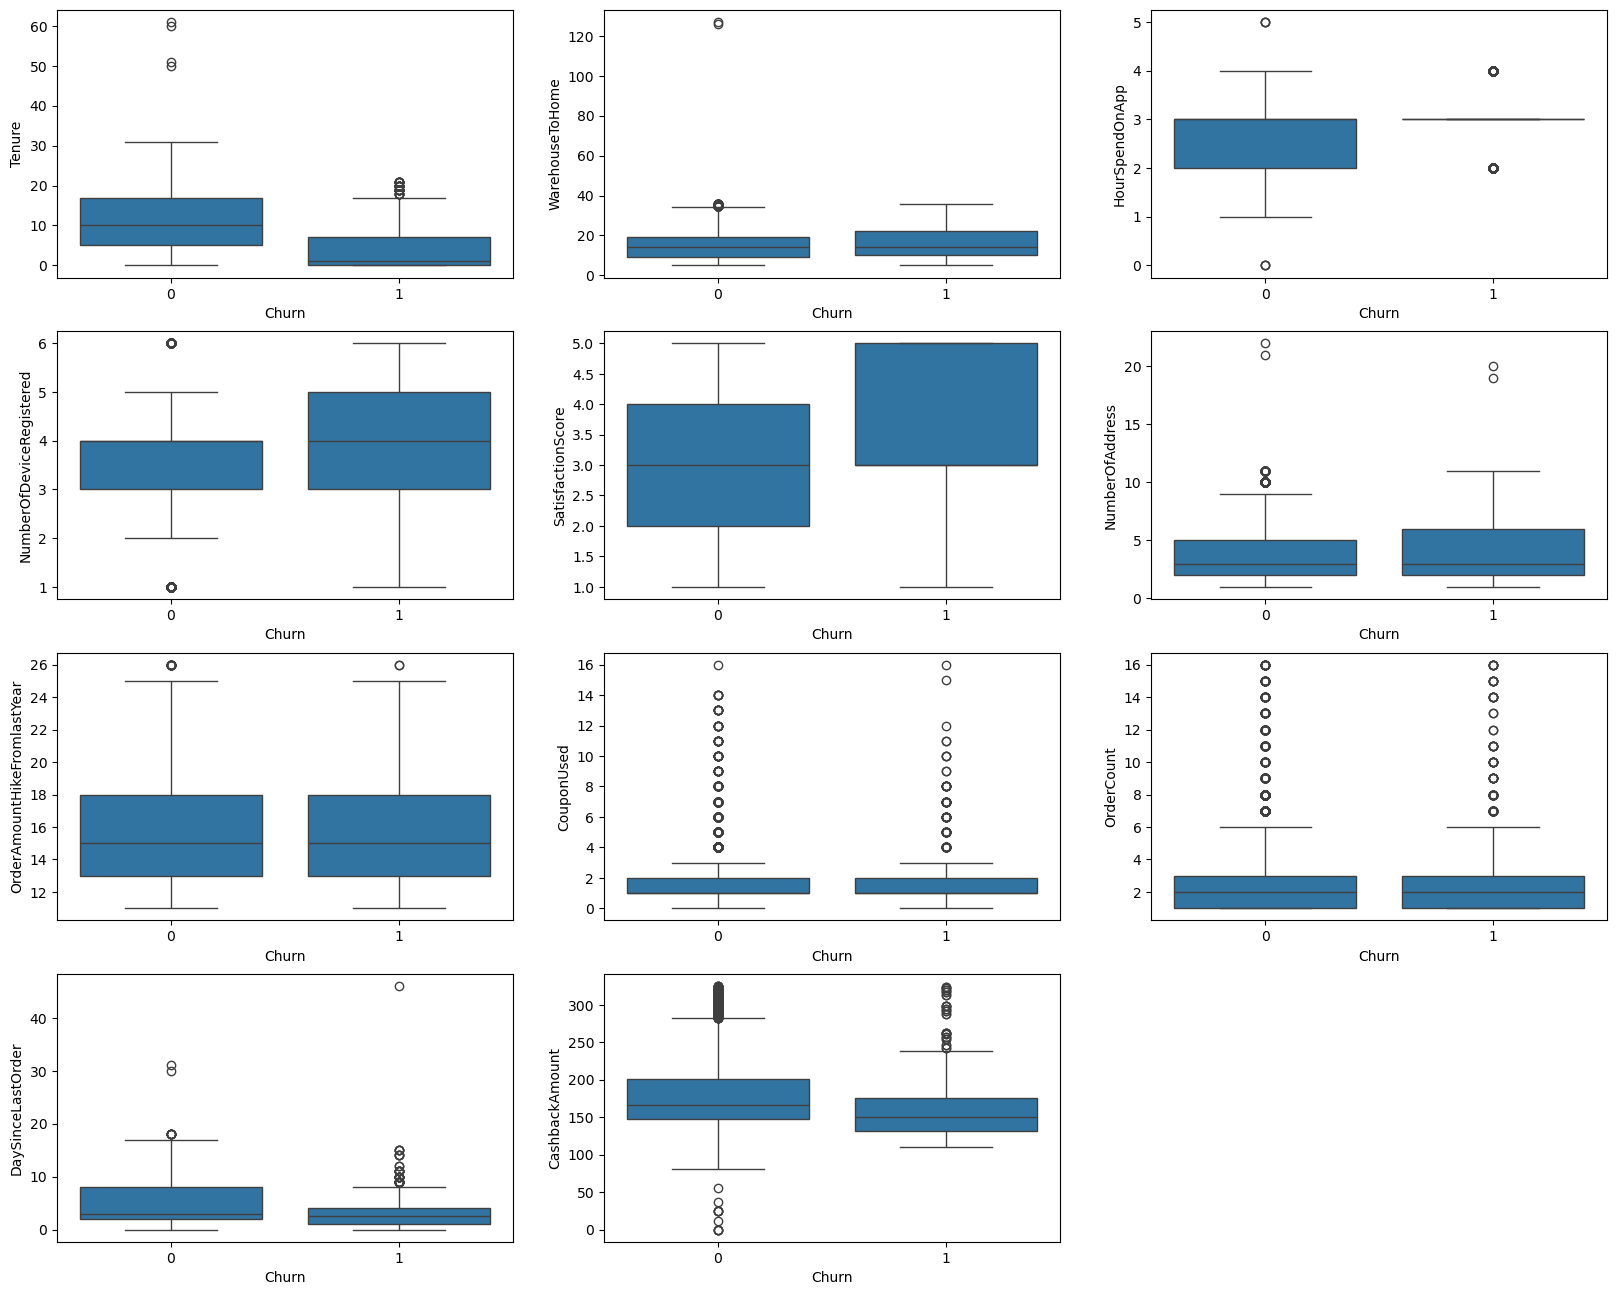

In [75]:
plt. figure(figsize=(20, 16))
plt. subplot(4,3,1)
sns.boxplot(x = 'Churn',y = 'Tenure', data = df)
plt. subplot (4,3,2)
sns.boxplot (x ='Churn',y='WarehouseToHome', data = df)
plt. subplot (4,3,3)
sns.boxplot(x ='Churn',y = 'HourSpendOnApp', data = df)
plt. subplot (4,3,4)
sns. boxplot(x ='Churn',y = 'NumberOfDeviceRegistered', data = df)
plt. subplot (4,3,5)
sns. boxplot(x = 'Churn', y = 'SatisfactionScore', data = df)
plt. subplot (4,3,6)
sns. boxplot(x ='Churn', y = 'NumberOfAddress', data = df)
plt. subplot (4,3,7)
sns. boxplot(x = 'Churn', y = 'OrderAmountHikeFromlastYear', data = df)
plt. subplot (4,3,8)
sns.boxplot(x ='Churn', y = 'CouponUsed', data = df)
plt. subplot (4,3,9)
sns. boxplot(x = 'Churn', y = 'OrderCount', data = df)
plt. subplot (4,3,10)
sns. boxplot(x = 'Churn',y = 'DaySinceLastOrder', data = df)
plt. subplot (4,3,11)
sns. boxplot(x = 'Churn', y = 'CashbackAmount', data = df)
plt. show( )

In [87]:
categorical_features = ['PreferredPaymentMode', 'PreferedOrderCat', 'MaritalStatus']

In [89]:
numerical_features = ['Tenure', 'PreferredLoginDevice', 'CityTier', 'WarehouseToHome', 'Gender', 'HourSpendOnApp','NumberOfDeviceRegistered']

In [91]:
df_features = df[numerical_features + categorical_features + ['Churn'] ]
df_features.head(10)

,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferredPaymentMode,PreferedOrderCat,MaritalStatus,Churn
0,4.0,0,3,6.0,1,3.0,3,Debit Card,Laptop & Accessory,Single,1
1,9.0,0,1,8.0,0,3.0,4,UPI,Mobile Phone,Single,1
2,9.0,0,1,30.0,0,2.0,4,Debit Card,Mobile Phone,Single,1
3,0.0,0,3,15.0,0,2.0,4,Debit Card,Laptop & Accessory,Single,1
4,0.0,0,1,12.0,0,3.0,3,Credit Card,Mobile Phone,Single,1
5,0.0,1,1,22.0,1,3.0,5,Debit Card,Mobile Phone,Single,1
6,9.0,0,3,11.0,0,2.0,3,COD,Laptop & Accessory,Divorced,1
7,9.0,0,1,6.0,0,3.0,3,Credit Card,Mobile Phone,Divorced,1
8,13.0,0,3,9.0,0,3.0,4,E wallet,Mobile Phone,Divorced,1
9,9.0,0,1,31.0,0,2.0,5,Debit Card,Mobile Phone,Single,1


In [101]:
def train_test_split_and_features (df_features):
    y = df_features["Churn"]
    x = df_features.drop( 'Churn' ,axis=1)
    x = pd.get_dummies(x,dtype = int)
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state = 0)
    print(x.head (5))
    print(x.columns)
    features = list(x.columns)
    return x_train, x_test, y_train, y_test, features

In [103]:
x_train, x_test, y_train, y_test,features = train_test_split_and_features(df_features)

   Tenure  PreferredLoginDevice  CityTier  WarehouseToHome  Gender  \
0     4.0                     0         3              6.0       1   
1     9.0                     0         1              8.0       0   
2     9.0                     0         1             30.0       0   
3     0.0                     0         3             15.0       0   
4     0.0                     0         1             12.0       0   

   HourSpendOnApp  NumberOfDeviceRegistered  PreferredPaymentMode_COD  \
0             3.0                         3                         0   
1             3.0                         4                         0   
2             2.0                         4                         0   
3             2.0                         4                         0   
4             3.0                         3                         0   

   PreferredPaymentMode_Credit Card  PreferredPaymentMode_Debit Card  \
0                                 0                                1

In [105]:
x_train.head(10)

,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferredPaymentMode_COD,PreferredPaymentMode_Credit Card,PreferredPaymentMode_Debit Card,PreferredPaymentMode_E wallet,PreferredPaymentMode_UPI,PreferedOrderCat_Fashion,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
1294,15.0,0,1,24.0,0,2.0,3,0,0,1,0,0,0,0,1,0,0,0,1,0
3904,18.0,0,1,9.0,1,4.0,2,0,0,1,0,0,1,0,0,0,0,0,1,0
3523,1.0,0,1,13.0,0,3.0,5,0,0,1,0,0,0,0,0,1,0,1,0,0
2100,18.0,0,3,17.0,1,2.0,3,0,0,1,0,0,0,1,0,0,0,0,1,0
4481,5.0,0,3,14.0,0,4.0,4,0,0,0,1,0,0,0,1,0,0,0,1,0
203,6.0,1,3,16.0,0,2.0,4,0,0,0,1,0,0,0,1,0,0,0,0,1
578,11.0,1,3,16.0,1,2.0,3,1,0,0,0,0,0,0,1,0,0,0,0,1
2743,6.0,1,1,13.0,0,2.0,3,0,0,1,0,0,0,0,1,0,0,0,1,0
3514,16.0,0,1,36.0,0,3.0,6,0,1,0,0,0,0,0,1,0,0,0,0,1
1085,9.0,0,1,27.0,0,3.0,1,0,1,0,0,0,0,0,0,1,0,0,1,0


In [127]:
def fit_and_evaluate_model(x_train, x_test, y_train, y_test, max_depth=5,min_samples_split=0.01, max_features=0.8, max_samples=0.8):
    random_forest = RandomForestClassifier(random_state=0, max_depth=max_depth, min_samples_split=min_samples_split, max_features=max_features,max_samples=max_samples)
    model = random_forest. fit(x_train, y_train)
    random_forest_predict = random_forest.predict(x_test)
    random_forest_conf_matrix = confusion_matrix(y_test, random_forest_predict)
    random_forest_acc_score = accuracy_score(y_test, random_forest_predict)
    print ("confussion matrix")
    print (random_forest_conf_matrix)
    print ("\n")
    print( "Accuracy of Random Forest:", random_forest_acc_score*100, '\n')
    print(classification_report(y_test, random_forest_predict))
    return model

In [129]:
model=fit_and_evaluate_model(x_train,x_test,y_train,y_test)

confussion matrix
[[908  31]
 [108  79]]


Accuracy of Random Forest: 87.65541740674956 

              precision    recall  f1-score   support

           0       0.89      0.97      0.93       939
           1       0.72      0.42      0.53       187

    accuracy                           0.88      1126
   macro avg       0.81      0.69      0.73      1126
weighted avg       0.86      0.88      0.86      1126



In [135]:
param_grid = [{'max_depth': [3,5,7,10], 'min_samples_split': [0.01,0.03, 0.07, 0.1],'max_features': [0.7,0.8,0.9,1.01],'max_samples': [0.7,0.8,0.9,1.0]}]

In [137]:
from sklearn.model_selection import GridSearchCV
model = RandomForestClassifier()
search = GridSearchCV(estimator = model, param_grid = param_grid, cv=5, verbose=5)
search.fit(x_train, y_train)

Fitting 5 folds for each of 256 candidates, totalling 1280 fits
[CV 1/5] END max_depth=3, max_features=0.7, max_samples=0.7, min_samples_split=0.01;, score=0.856 total time=   0.1s
[CV 2/5] END max_depth=3, max_features=0.7, max_samples=0.7, min_samples_split=0.01;, score=0.867 total time=   0.1s
[CV 3/5] END max_depth=3, max_features=0.7, max_samples=0.7, min_samples_split=0.01;, score=0.879 total time=   0.1s
[CV 4/5] END max_depth=3, max_features=0.7, max_samples=0.7, min_samples_split=0.01;, score=0.851 total time=   0.1s
[CV 5/5] END max_depth=3, max_features=0.7, max_samples=0.7, min_samples_split=0.01;, score=0.844 total time=   0.1s
[CV 1/5] END max_depth=3, max_features=0.7, max_samples=0.7, min_samples_split=0.03;, score=0.853 total time=   0.1s
[CV 2/5] END max_depth=3, max_features=0.7, max_samples=0.7, min_samples_split=0.03;, score=0.867 total time=   0.1s
[CV 3/5] END max_depth=3, max_features=0.7, max_samples=0.7, min_samples_split=0.03;, score=0.877 total time=   0.1s


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [3, 5, 7, 10],
                          'max_features': [0.7, 0.8, 0.9, 1.01],
                          'max_samples': [0.7, 0.8, 0.9, 1.0],
                          'min_samples_split': [0.01, 0.03, 0.07, 0.1]}],
             verbose=5)

In [142]:
results = pd.DataFrame(search.cv_results_)
results.sort_values('mean_test_score',inplace=True,ascending= False)
results.head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_max_samples,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
236,0.237262,0.000820,0.004995,0.000035,10,0.9,1.0,0.01,"{'max_depth': 10, 'max_features': 0.9, 'max_sa...",0.872364,0.894562,0.913430,0.863485,0.863333,0.881435,0.019637,1
220,0.218147,0.004647,0.005204,0.000458,10,0.8,1.0,0.01,"{'max_depth': 10, 'max_features': 0.8, 'max_sa...",0.871254,0.887902,0.911210,0.865705,0.863333,0.879881,0.017861,2
196,0.173933,0.001143,0.004871,0.000071,10,0.7,0.8,0.01,"{'max_depth': 10, 'max_features': 0.7, 'max_sa...",0.871254,0.883463,0.913430,0.865705,0.864444,0.879659,0.018176,3
212,0.193329,0.002151,0.004905,0.000220,10,0.8,0.8,0.01,"{'max_depth': 10, 'max_features': 0.8, 'max_sa...",0.874584,0.889012,0.907880,0.861265,0.864444,0.879437,0.017200,4
208,0.178349,0.001962,0.004832,0.000166,10,0.8,0.7,0.01,"{'max_depth': 10, 'max_features': 0.8, 'max_sa...",0.873474,0.885683,0.906770,0.866815,0.863333,0.879215,0.015749,5
216,0.209682,0.007156,0.004975,0.000069,10,0.8,0.9,0.01,"{'max_depth': 10, 'max_features': 0.8, 'max_sa...",0.866815,0.882353,0.908990,0.864595,0.872222,0.878995,0.016202,6
204,0.196345,0.001087,0.005016,0.000123,10,0.7,1.0,0.01,"{'max_depth': 10, 'max_features': 0.7, 'max_sa...",0.874584,0.883463,0.915649,0.860155,0.857778,0.878326,0.020908,7
192,0.161854,0.000909,0.004841,0.000057,10,0.7,0.7,0.01,"{'max_depth': 10, 'max_features': 0.7, 'max_sa...",0.865705,0.890122,0.906770,0.866815,0.861111,0.878105,0.017528,8
228,0.211161,0.001602,0.004828,0.000117,10,0.9,0.8,0.01,"{'max_depth': 10, 'max_features': 0.9, 'max_sa...",0.870144,0.885683,0.902331,0.859046,0.871111,0.877663,0.014959,9
140,0.171256,0.000649,0.004282,0.000069,7,0.7,1.0,0.01,"{'max_depth': 7, 'max_features': 0.7, 'max_sam...",0.872364,0.887902,0.905660,0.861265,0.860000,0.877438,0.017305,10


In [144]:
results_save = pd.DataFrame(search.cv_results_)
results_save.to_csv("results_save.csv", index =False)

In [146]:
search.best_params_

{'max_depth': 10,
 'max_features': 0.9,
 'max_samples': 1.0,
 'min_samples_split': 0.01}

In [156]:
model = fit_and_evaluate_model(x_train, x_test, y_train, y_test, max_depth=10, min_samples_split=0.01, \
max_features=0.7, max_samples = 1.0)

confussion matrix
[[910  29]
 [ 98  89]]


Accuracy of Random Forest: 88.72113676731794 

              precision    recall  f1-score   support

           0       0.90      0.97      0.93       939
           1       0.75      0.48      0.58       187

    accuracy                           0.89      1126
   macro avg       0.83      0.72      0.76      1126
weighted avg       0.88      0.89      0.88      1126



In [158]:
importances = pd.DataFrame(model.feature_importances_)
importances['features'] = features 
importances.columns = ['importance','feature']
importances.sort_values(by = 'importance', ascending= True, inplace=True)

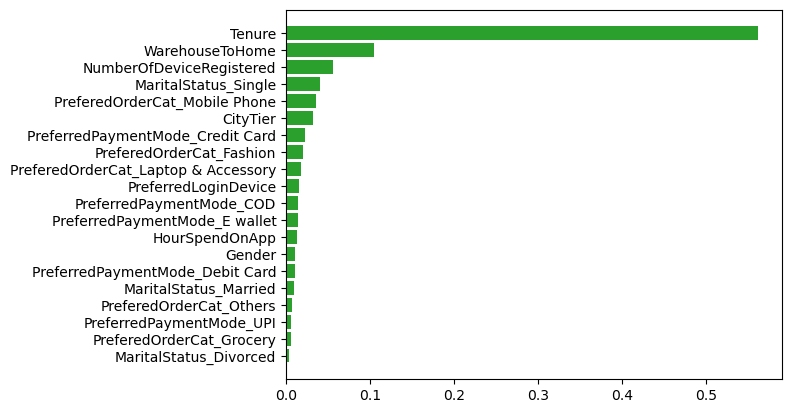

In [164]:
import matplotlib.pyplot as plt
plt.barh(importances.feature,importances.importance)
plt.show()